# Project Description

In this project I wanted to create code to help streamline the analysis of BCA assays and allow my labmates to use the code to quickly analyze their assays. BCA assays are used to quantify total protein levels in cell lysates or purified protein. My lab performs them regularly in order to prepare samples to load for Western Blots. In my lab, our protocol for BCA assays is very methodical and thus is perfect for a bioinformatic approach. This assay centers around the use of a 96 well plate, such as the one shown below:

<img src = '96wellplateimage.png' style = 'width:500px'>

When conducting the BCA assay, 20 uL of 6 known concentrations of bovine serum albumin (BSA) are used as a control to create a standard curve. These standard curves are loaded in lanes 1 through 6 and 7 through 12 to prevent edge effects such as evaporation from affecting the standard curve. For instance, in a BCA assay, one would prepare 0 mg/mL BSA, 0.125 mg/mL BSA, 0.25 mg/mL BSA, 0.5 mg/mL BSA, 1.0 mg/mL BSA, and 2.0 mg/mL BSA which would be loaded from lowest to highest in lanes 1 to 6 and again in lanes 7 to 12. 

To preserve precious sample, 2 uL of each experimental lysates are loaded with 18 uL of lysis buffer for a total volume of 20 uL. Concentrations are adjusted to compare to control during analysis. Like the standards, we also typically load two replicates of every sample but will load replicates next to one another (1 & 2, 3 & 4, etc.) in order to prevent complicating the loading process.

Once all samples are loaded, a resolving buffer which includes the Bicinchoninic acid reagent for which the assay is named, is created and 150 uL is added to each well where sample or standard was loaded. When first created, the resolving buffer is a light green but will react with proteins in the lysate to change to a purple color during a 30 minute incubation at 37 degrees Celsius. The more protein is present, the darker the mixture will become (the standard with no added protein will also change color over time but much less rapidly).

To quantify total protein levels, the 96 well plate is loaded into a spectrophotometer to measure absorbance at 562 nm. The software we use in the lab produces a text file that we typically will transfer to an Excel sheet to perform our analysis but the process of manually selecting each cell and performing the calculations can amount to a very tedious task. In this project, I created a class function that will take a csv file directly and create a dataframe that mimics the 96 well plate. From there, my labmates will be able to quantify total protein levels using the functions I created to complete BCA assay analyses much more rapidly.

## Project Code

If it makes sense for your project, you can have code and outputs here in the notebook as well.

In [1]:
from my_module.functions import standard_averages, standard_equation, sample_concentrations, loading
from my_module.classes import TotalProteinAssay

In [2]:
# First create a class object using the csv file taken from the plate reader and assign dataframe
western = TotalProteinAssay('Sample_BCA.csv')

df = western.bca

df

,1,2,3,4,5,6,7,8,9,10,11,12
A,0.1528,0.2935,0.4550,0.7416,1.3015,2.3295,0.1537,0.2865,0.4426,0.7373,1.2814,2.3282
B,0.4684,0.4379,0.4195,0.4195,0.4445,0.4145,0.4065,0.4113,0.4396,0.4093,0.0469,0.0468
C,0.3812,0.3904,0.3588,0.3548,0.3808,0.3735,0.4072,0.4074,0.4088,0.3661,0.0484,0.0495
D,0.4564,0.4373,0.3664,0.3591,0.3997,0.3986,0.3989,0.3959,0.4150,0.4100,0.0483,0.0486
E,0.4322,0.4062,0.3996,0.4001,0.4046,0.3907,0.4165,0.4062,0.3873,0.3761,0.0482,0.0484
F,0.0470,0.0469,0.0474,0.0474,0.0470,0.0479,0.0469,0.0484,0.0472,0.0473,0.0474,0.0472
G,0.0462,0.0474,0.0471,0.0471,0.0474,0.0477,0.0470,0.0469,0.0471,0.0485,0.0469,0.0475
H,0.0474,0.0470,0.0472,0.0472,0.0472,0.0467,0.0466,0.0470,0.0470,0.0469,0.0468,0.0470


In [3]:
# Average absorbances of BSA standards for standard curve calculation
std_avg = standard_averages(df, 'A')

coefficient of determination: 0.9992235694737742


'absorbance = 1.0884851612903228(concentration) + 0.17231999999999992'

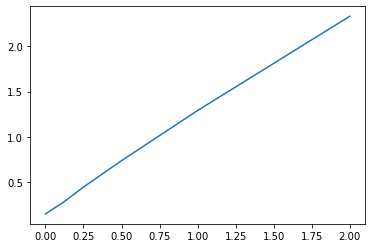

In [4]:
# Calculate standard curve 
standard_equation(std_avg)

In [5]:
# Calculate protein concentrations of samples, can be used to normalize for assays like mass spectrometry
western_conc = sample_concentrations(df, 'B', 'C', 'D', 'E')

western_conc

Enter slope: 1.088
Enter y intercept: 0.172


{'Sample 1': 2.5840992647058822,
 'Sample 2': 2.2748161764705883,
 'Sample 3': 2.3667279411764706,
 'Sample 4': 2.1773897058823524,
 'Sample 5': 2.3203125,
 'Sample 6': 1.965073529411765,
 'Sample 7': 1.698529411764706,
 'Sample 8': 1.8855698529411762,
 'Sample 9': 2.1626838235294117,
 'Sample 10': 1.9802389705882348,
 'Sample 11': 2.526194852941176,
 'Sample 12': 1.7532169117647058,
 'Sample 13': 2.0877757352941178,
 'Sample 14': 2.071691176470588,
 'Sample 15': 2.21047794117647,
 'Sample 16': 2.272058823529412,
 'Sample 17': 2.09420955882353,
 'Sample 18': 2.073988970588235,
 'Sample 19': 2.199908088235294,
 'Sample 20': 1.9273897058823528}

In [6]:
# If continuing to Western blot, calculate amount of sample to load after adding 4x sample buffer
loading(western_conc, 15)

{'Sample 1': 7.7396407611595235,
 'Sample 2': 8.791919191919192,
 'Sample 3': 8.450485436893205,
 'Sample 4': 9.185310257492615,
 'Sample 5': 8.61952861952862,
 'Sample 6': 10.177736202057996,
 'Sample 7': 11.774891774891774,
 'Sample 8': 10.606873019741654,
 'Sample 9': 9.247768805779856,
 'Sample 10': 10.09979113483407,
 'Sample 11': 7.917045661269784,
 'Sample 12': 11.407601572739187,
 'Sample 13': 9.579572969403477,
 'Sample 14': 9.653948535936115,
 'Sample 15': 9.04781704781705,
 'Sample 16': 8.802588996763753,
 'Sample 17': 9.550142637700239,
 'Sample 18': 9.643252825171729,
 'Sample 19': 9.091288907457699,
 'Sample 20': 10.376728659990464}

In [7]:
!pytest

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1
rootdir: /home/n1tsai/Project_COGS18_SP21
collected 3 items                                                              

my_module/test_functions.py ...                                          [100%]

============================== 3 passed in 1.40s ===============================


#### Extra Credit (*optional*)

Prior to taking this course, I took one high school class called 'Introduction to Programming' that included a very brief lesson in Python. However, the main focus of the high school class was web design using html. I believe that I challenged myself in this project by exploring sklearn and pyplot functions. I also challenged myself to learn more about pandas and the use of dataframes for data analysis. 